In [7]:
import numpy as np
import matplotlib.pyplot as plt
from flyeye.data.experiments import Experiment
from figures.dynamics import Expression    
from figures.comparison import DosingComparison
%matplotlib inline

# Load dosage experiment data

In [5]:
pnt1x = Experiment('../data/published/pntgfp_dosing/1xPntGFP/', normalization='blue')
pnt2x = Experiment('../data/published/pntgfp_dosing/2xPntGFP/', normalization='blue')

# Figure 4 A-D

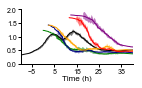

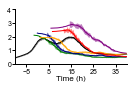

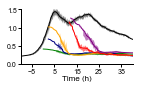

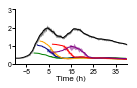

In [3]:
# define cell types
neurons = [['r8'],['r2','r5'],['r3','r4'],['r1','r6'],['r7']]

# define number of bootstrap samples (10k used for manuscript)
interval_kw = dict(nbootstraps=10) 

# Fig 4A (Pnt levels, 1x PntGFP)
fig4A = Expression(pnt1x)
ax_kw = dict(xlim=(-10, 40), ylim=(0, 2), yticks=np.arange(0, 2.1, .5))
fig4A.render('green', neurons, interval=True, ax_kw=ax_kw, interval_kw=interval_kw)

# Fig 4B (Pnt levels, 2x PntGFP)
fig4B = Expression(pnt2x)
ax_kw = dict(xlim=(-10, 40), ylim=(0, 4), yticks=np.arange(0, 4.1, 1.))
fig4B.render('green', neurons, interval=True, ax_kw=ax_kw, interval_kw=interval_kw)

# Fig 4C (Yan levels, 1x PntGFP)
fig4C = Expression(pnt1x)
ax_kw = dict(xlim=(-10, 40), ylim=(0, 1.5), yticks=np.arange(0, 1.6, .5))
fig4C.render('red', neurons, interval=True, ax_kw=ax_kw, interval_kw=interval_kw)

# Fig 4D (Yan levels, 2x PntGFP)
fig4D = Expression(pnt2x)
ax_kw = dict(xlim=(-10, 40), ylim=(0, 3), yticks=np.arange(0, 3.1, 1.))
fig4D.render('red', neurons, interval=True, ax_kw=ax_kw, interval_kw=interval_kw)

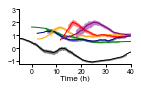

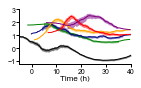

In [18]:
# define cell types
neurons = [['r8'],['r2','r5'],['r3','r4'],['r1','r6'],['r7']]

# define number of bootstrap samples (10k used for manuscript)
interval_kw = dict(nbootstraps=1000) 

# Fig 4C (Yan levels, 1x PntGFP)
fig4C = Expression(pnt1x)
ax_kw = dict(xlim=(-5, 40), ylim=(-1.2, 3), yticks=np.arange(-1, 3.1, 1.))
fig4C.render('ratio', neurons, interval=True, ax_kw=ax_kw, interval_kw=interval_kw)

# Fig 4D (Yan levels, 2x PntGFP)
fig4D = Expression(pnt2x)
ax_kw = dict(xlim=(-5, 40), ylim=(-1.2, 3), yticks=np.arange(-1, 3.1, 1.))
fig4D.render('ratio', neurons, interval=True, ax_kw=ax_kw, interval_kw=interval_kw)

fig4C.save(name='pnt1x', directory='/Users/Sebi/Documents/grad_school/thesis/defense/figures/')
fig4D.save(name='pnt2x', directory='/Users/Sebi/Documents/grad_school/thesis/defense/figures/')

# Figure 4 E

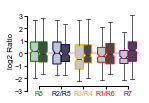

In [4]:
fig4E = DosingComparison.from_experiment(pnt1x, pnt2x)
fig4E.render(channel='ratio')

In [5]:
fig4E.get_statistics()

,log10 pval
R1/R6,-0.95
R2/R5,-0.29
R3/R4,-3.05
R7,-9.67
R8,-0.43


# Load yan clones data

In [ ]:
from clones.data.experiments import Experiment
from clones.analysis.statistics import SummaryStatistics

# define measurement inclusion criteria
options = dict(selected_only=True, exclude_boundary=True)

# load control clone measurements
control_exp = Experiment('../data/clones/bleedthrough_control')
control = control_exp.aggregate_measurements(**options)

# load yan mutant clone measurements
perturbation_exp = Experiment('../data/clones/yanE833')
perturbation = perturbation_exp.aggregate_measurements(**options)

## Statistical comparison between clones

In [ ]:
# evaluate pvalues for (M vs H) and (H vs W) comparisons under each condition
_ = SummaryStatistics(control, perturbation, basis='gc_normalized')

# Figure 4 H

In [ ]:
from clones.analysis.statistics import CloneComparison
import matplotlib.pyplot as plt
import numpy as np

def clones_figure(data):
    
    # create figure/axes
    fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(3, 1.5))
    
    # plot clonal marker comparison
    prfp = CloneComparison(data, 'm', 'h', basis='r_normalized')
    prfp.plot(ax=ax0, ylabel='UbiRFP (a.u.)', cut=1)
    ax0.set_ylim(-0.1, 2.5)
    ax0.set_yticks(np.arange(0, 2.5+.1, .5))
    
    # plot PntGFP comparison
    pgfp = CloneComparison(data, 'm', 'h', basis='gc_normalized')
    pgfp.plot(ax=ax1, ylabel='PntGFP (a.u.)', cut=1)
    ax1.set_ylim(-0.1, 1.2)
    ax1.set_yticks(np.arange(0, 1.2+.1, .2))
    
    # enforce tight layout
    plt.tight_layout()
    
    return fig

%matplotlib inline

In [ ]:
# compare bleedthrough control clones
control_fig = clones_figure(control)

# compare yan mutant clones
perturbation_fig = clones_figure(perturbation)